In [1]:
from ugropy import abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(1, 220, 220, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    if smiles != "ClC(Cl)C(=O)N(C)c1ccc(cc1)OC(=O)C2=CC=CO2":
        continue
       
    solution = abdulelah_gani_p.get_groups(smiles, "smiles", search_multiple_solutions=True)
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if all([sol.subgroups_numbers != row_dict for sol in solution]):
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print("\n".join(str(sol.subgroups) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print("\n".join(str(sol.subgroups_numbers) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        gani_groups = {}
        for group, ocurr in row_dict.items():
            group_name = abdulelah_gani_p.subgroups_info.loc[abdulelah_gani_p.subgroups_info["group_number"] == group].index[0]
            gani_groups[group_name] = ocurr
            
        print("Gani group names:")
        print(gani_groups)
        
        wrong_smiles = smiles
        break


In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_p.detect_fragments(mol)


NameError: name 'wrong_smiles' is not defined

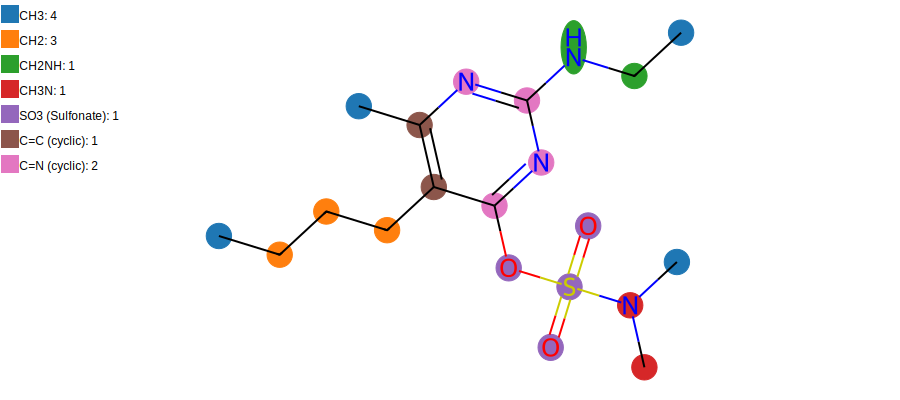

In [ ]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=900, height=400)

In [ ]:
sols = abdulelah_gani_p.get_groups(wrong_smiles, "smiles", search_multiple_solutions=True)

for sol in sols:
    print(sol.subgroups_numbers)

{1: 4, 2: 3, 58: 1, 60: 1, 151: 1, 173: 1, 178: 2}


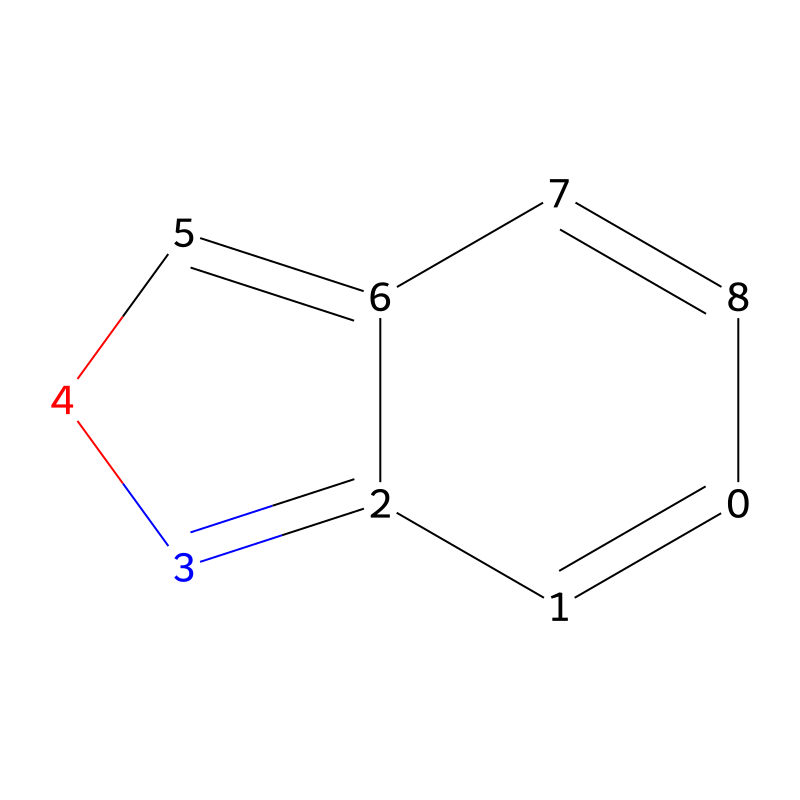

In [ ]:
from rdkit.Chem import Draw
from rdkit import Chem

smiles = "C1=CC2=NOC=C2C=C1"

mol = instantiate_mol_object(smiles, "smiles")
mol = abdulelah_gani_p.mol_preprocess(mol)

# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(800, 800))

img

In [8]:
smt = Chem.MolFromSmarts("[cH0;$([cH0;R2,R3]([a;R2,R3]([a;R])[A;R])([a;R])[a;R]),$([cH0;R2,R3]([a;R2,R3]([a;R])[a;R])([a;R])[A;R]),$([cH0;R2,R3]([a;R2,R3]([a;R])[A;R])([a;R])[A;R])]")

mol.GetSubstructMatches(smt)

()

In [9]:
df[df[1]>0].index[0]

'BrC'

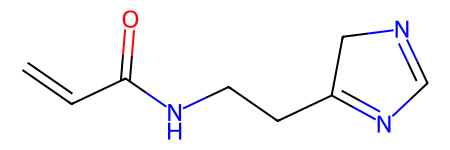

In [10]:
smiles = "C=CC(=O)NCCC1=NC=NC1"

mol = instantiate_mol_object(smiles, "smiles")

mol

In [11]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

60
2
OCCN(C(=O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I


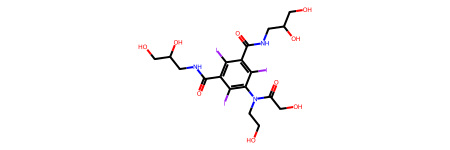

In [12]:
group = "241"
idx = 55

cantidad = df[df[group]>0].shape[0]
ocurr = df[df[group]>0][group].iloc[idx]
smiles = df[df[group]>0].index[idx]

print(cantidad)
print(ocurr)
print(smiles)

mol = instantiate_mol_object(smiles, "smiles")
mol

In [13]:
df[df[group]>1][group].iloc[0]

np.int64(3)